# COSC 30103 Lab 1
Oscar Arenas

## Dataset
Dataset taken from https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

### Instructions
1. Unzip the folder
2. View uncleaned data (hotel_bookings.csv) using viewer of choice
3. Open Lab1.ipynb
4. Click on 'Run' tab and select 'Run All Cells' to run cells and clean data
5. View cleaned data in output file (cleaned_hotel_bookings.csv) under same directory

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True

In [14]:
#Load and verify dataset
hotel = pd.read_csv("hotel_bookings.csv")
originalshape = hotel.shape
display(hotel.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
#Check where NaN exist
nan_df = hotel[hotel.isna().any(axis=1)]
display(nan_df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
#Remove trailing spaces from column names
hotel.columns = hotel.columns.str.strip()

#Drop rows with too many NaN values
hotel = hotel.dropna(thresh = len(hotel.columns) * 0.5) #rows with >50% missing values

#Drop columns with too many NaN values
missing_percent = hotel.isnull().sum() / len(hotel)
hotel = hotel.loc[:, missing_percent < 0.75] #Columns with >75% missing values

#Fill missing values in specific columns and recheck for NaN
agentavg = hotel['agent'].mean()
hotel['agent'] = hotel['agent'].fillna(agentavg)

#Display NaN again and drop all remaining NaN
display(nan_df.head())
df = hotel.dropna(how = 'any')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [17]:
#Convert data types
#Categorical
categorical_cols = [
    "hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel",
    "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"
]
df[categorical_cols] = df[categorical_cols].astype("category")

# Convert to integer
int_cols = [
    "lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month",
    "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", 
    "previous_cancellations", "previous_bookings_not_canceled",
    "booking_changes", "days_in_waiting_list", "required_car_parking_spaces",
    "total_of_special_requests"
]
df[int_cols] = df[int_cols].fillna(0).astype(int)  # Fill NaN with 0 before conversion

# Convert binary columns to boolean
bool_cols = ["is_canceled", "is_repeated_guest"]
df[bool_cols] = df[bool_cols].astype(bool)

# Convert to float
df["adr"] = df["adr"].astype(float)

# Convert to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], errors='coerce')

#Print data types and verify
print (df.dtypes)

hotel                                   category
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

array([[<Axes: title={'center': 'arrival_date_week_number'}>]],
      dtype=object)

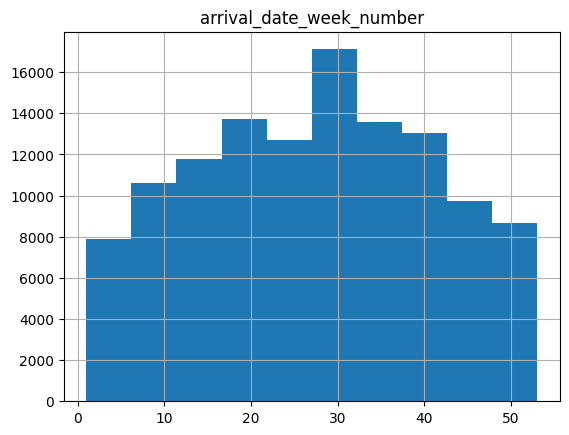

In [18]:
df.hist(column = 'arrival_date_week_number')

In [19]:
df.to_csv("cleaned_hotel_bookings.csv", index = False)
print("Dataset successfully cleaned and converted!")

Dataset successfully cleaned and converted!


In [20]:
#Compare old dataframe to cleaned one
print(originalshape)
print(df.shape)

(119390, 32)
(118898, 31)
